### Importing necessary ML modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/user/Desktop/Landslide prediction/landslide dataset.csv")

In [3]:
df

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope
0,0,3,3,2,2,2,1,4,2,2,3,3,2
1,0,1,5,2,3,1,1,4,2,5,5,2,2
2,0,3,4,3,2,2,4,3,2,4,5,2,2
3,0,1,3,3,3,5,1,2,4,3,5,3,3
4,0,5,4,2,1,4,1,2,4,3,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,1,4,2,1,4,2,5,1,5,3,2,4,2
1208,1,4,5,1,5,3,5,1,5,5,2,1,5
1209,1,3,4,1,5,2,5,2,3,3,2,2,5
1210,1,2,2,1,3,1,1,5,1,1,1,3,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Landslide      1212 non-null   int64
 1   Aspect         1212 non-null   int64
 2   Curvature      1212 non-null   int64
 3   Earthquake     1212 non-null   int64
 4   Elevation      1212 non-null   int64
 5   Flow           1212 non-null   int64
 6   Lithology      1212 non-null   int64
 7   NDVI           1212 non-null   int64
 8   NDWI           1212 non-null   int64
 9   Plan           1212 non-null   int64
 10  Precipitation  1212 non-null   int64
 11  Profile        1212 non-null   int64
 12  Slope          1212 non-null   int64
dtypes: int64(13)
memory usage: 123.2 KB


### Checking for null values

In [5]:
df.isnull().sum()

Landslide        0
Aspect           0
Curvature        0
Earthquake       0
Elevation        0
Flow             0
Lithology        0
NDVI             0
NDWI             0
Plan             0
Precipitation    0
Profile          0
Slope            0
dtype: int64

In [6]:
df.describe()

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,0.500000,2.962046,2.977723,2.102310,2.436469,2.338284,1.948845,3.042904,2.773927,3.059406,3.813531,3.262376,2.811881
std,0.500206,1.147378,1.099658,0.669812,1.242686,1.112686,1.424345,1.239246,1.299830,1.057287,1.347799,1.039502,1.194229
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000
50%,0.500000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000
75%,1.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000
max,1.000000,5.000000,5.000000,3.000000,5.000000,5.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
numeric_columns = [column for column in df.columns if df.dtypes[column] != 'object']
correlation = df[numeric_columns].corr()

## Data visualization

### Box plot -

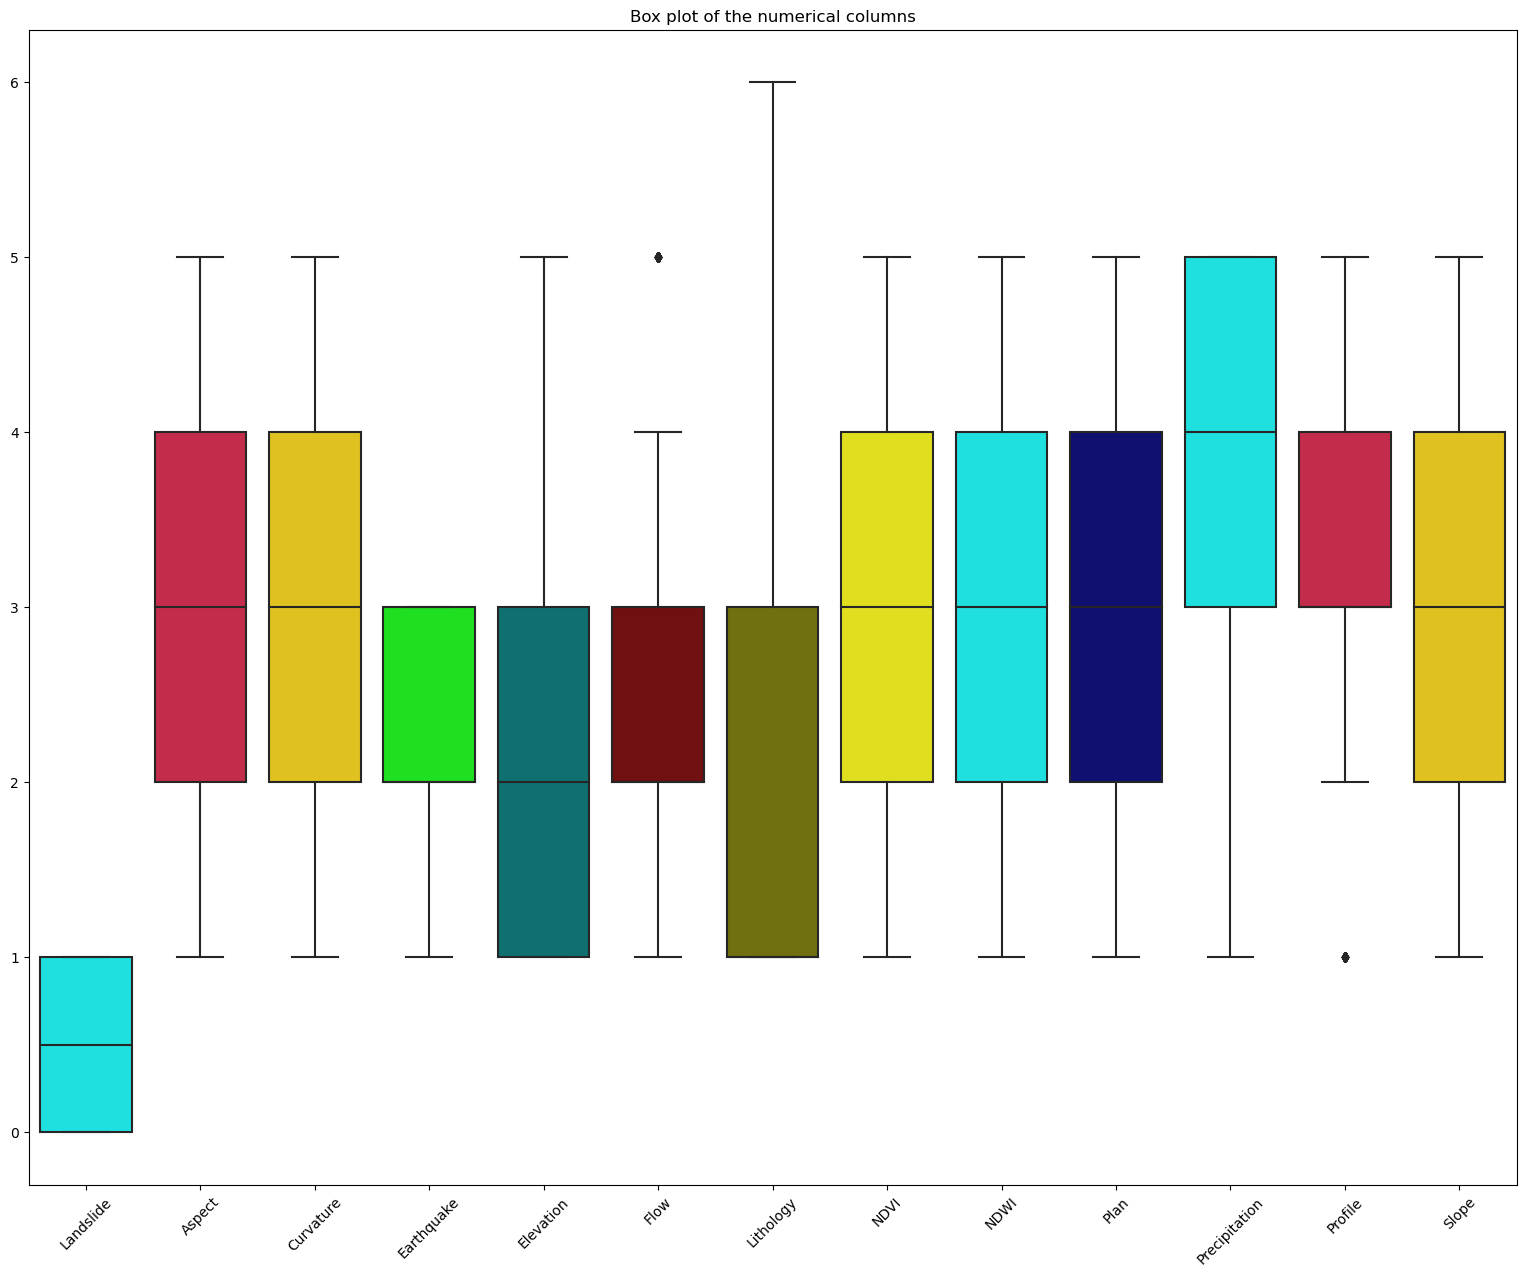

In [8]:
# Define custom colors for the boxplot
custom_colors = ['cyan', 'crimson', 'gold', 'lime', 'teal', 'maroon', 'olive', 'yellow', 'aqua', 'navy']

# Plotting boxplot with custom colors
plt.figure(figsize=(19.2, 15))
sns.boxplot(data=df[numeric_columns], palette=custom_colors)
plt.xticks(rotation=45)
plt.title('Box plot of the numerical columns')
plt.show()

### Heat map -

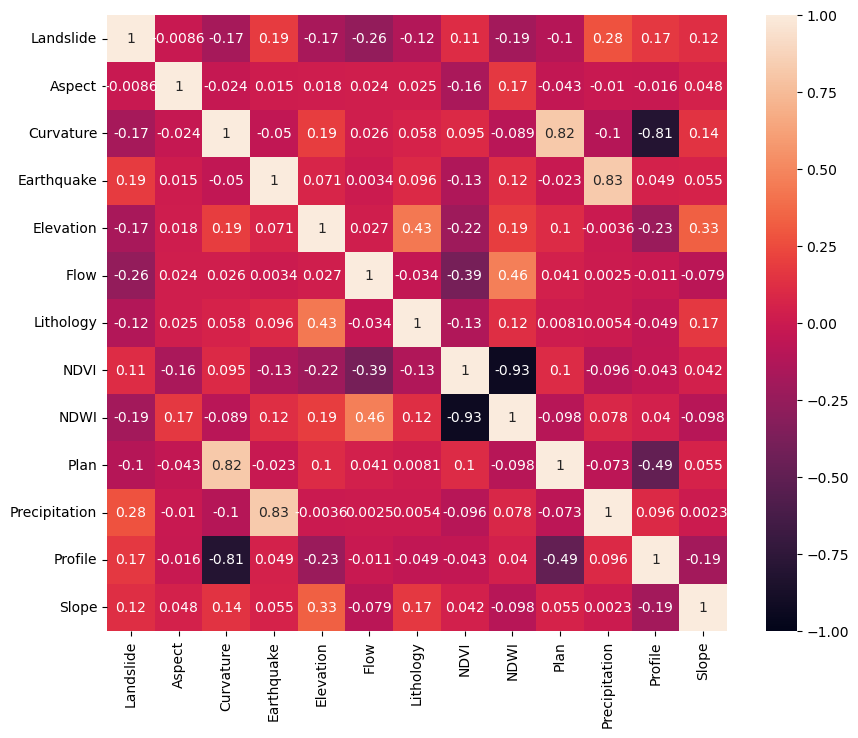

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, vmin=-1.0, vmax=1.0)
plt.show()

### Training and testing of the model


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib # For saving the model

# Extract features (X) and target variable (y)
X = df.drop('Landslide', axis=1)
y = df['Landslide']

# Split data into training data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Logistic Regression Model


Training Accuracy: 0.75
Testing Accuracy: 0.73
Confusion Matrix:
[[92 46]
 [20 85]]


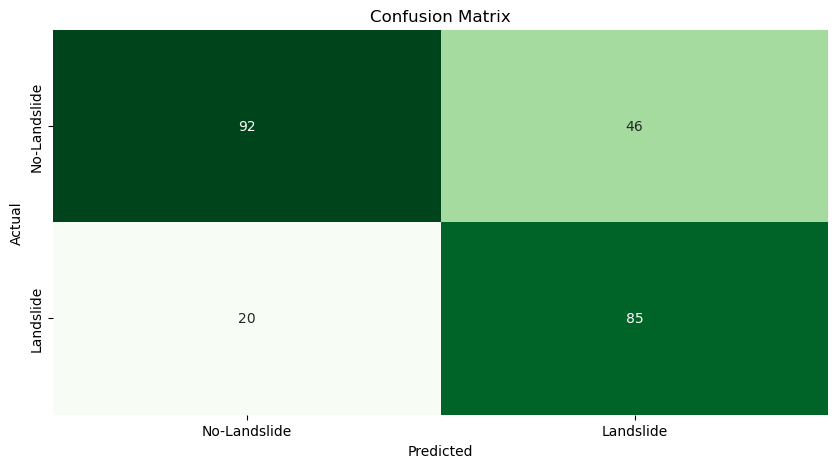

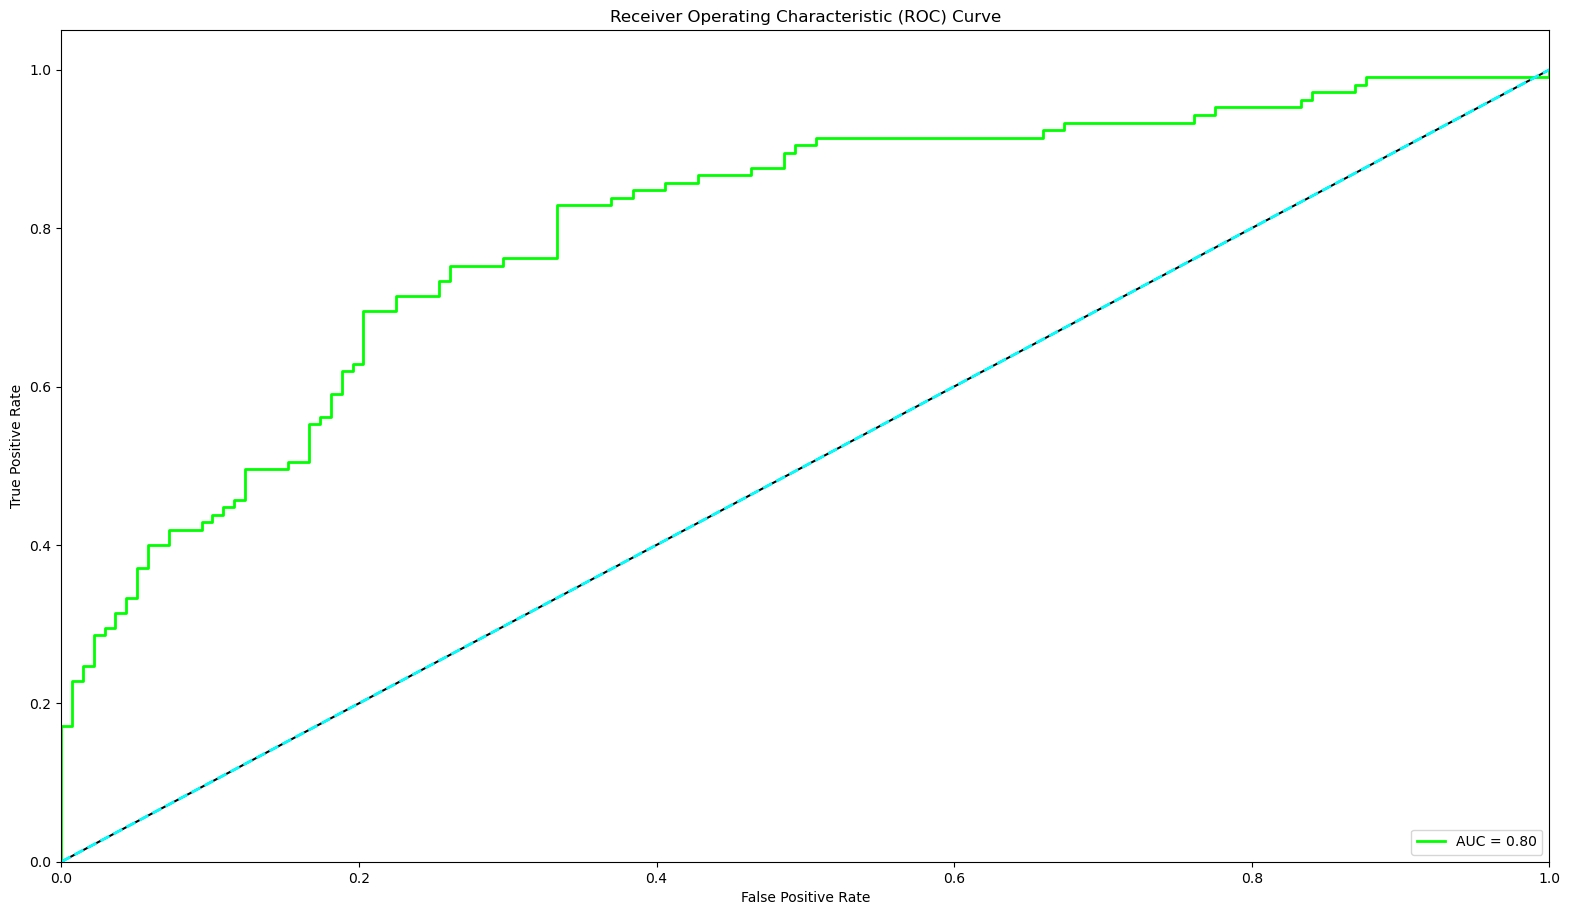

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Assuming X and y are already defined as features and target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression model within a pipeline to include scaling
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['No-Landslide', 'Landslide'], yticklabels=['No-Landslide', 'Landslide'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC score for test set
y_prob = pipeline.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(19.2, 10.8))
plt.plot(fpr, tpr, color='lime', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='black')
plt.plot([0, 1], [0, 1], color='cyan', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Random Forest Model

Training Accuracy: 1.00
Testing Accuracy: 0.77
Confusion Matrix:
[[101  37]
 [ 19  86]]


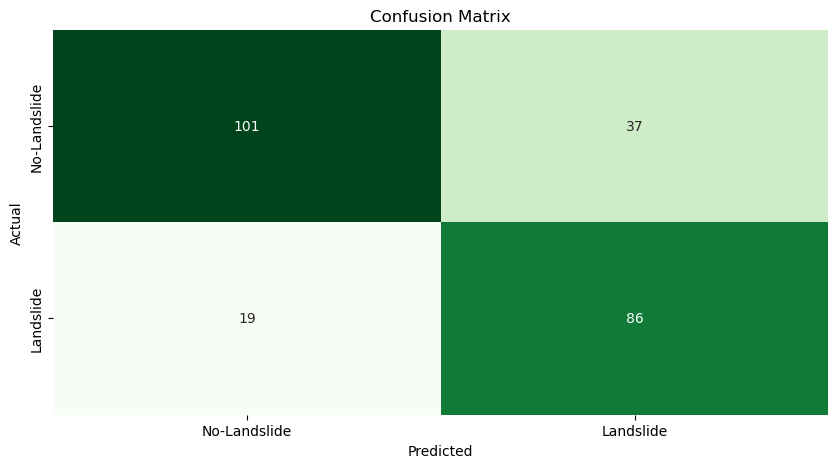

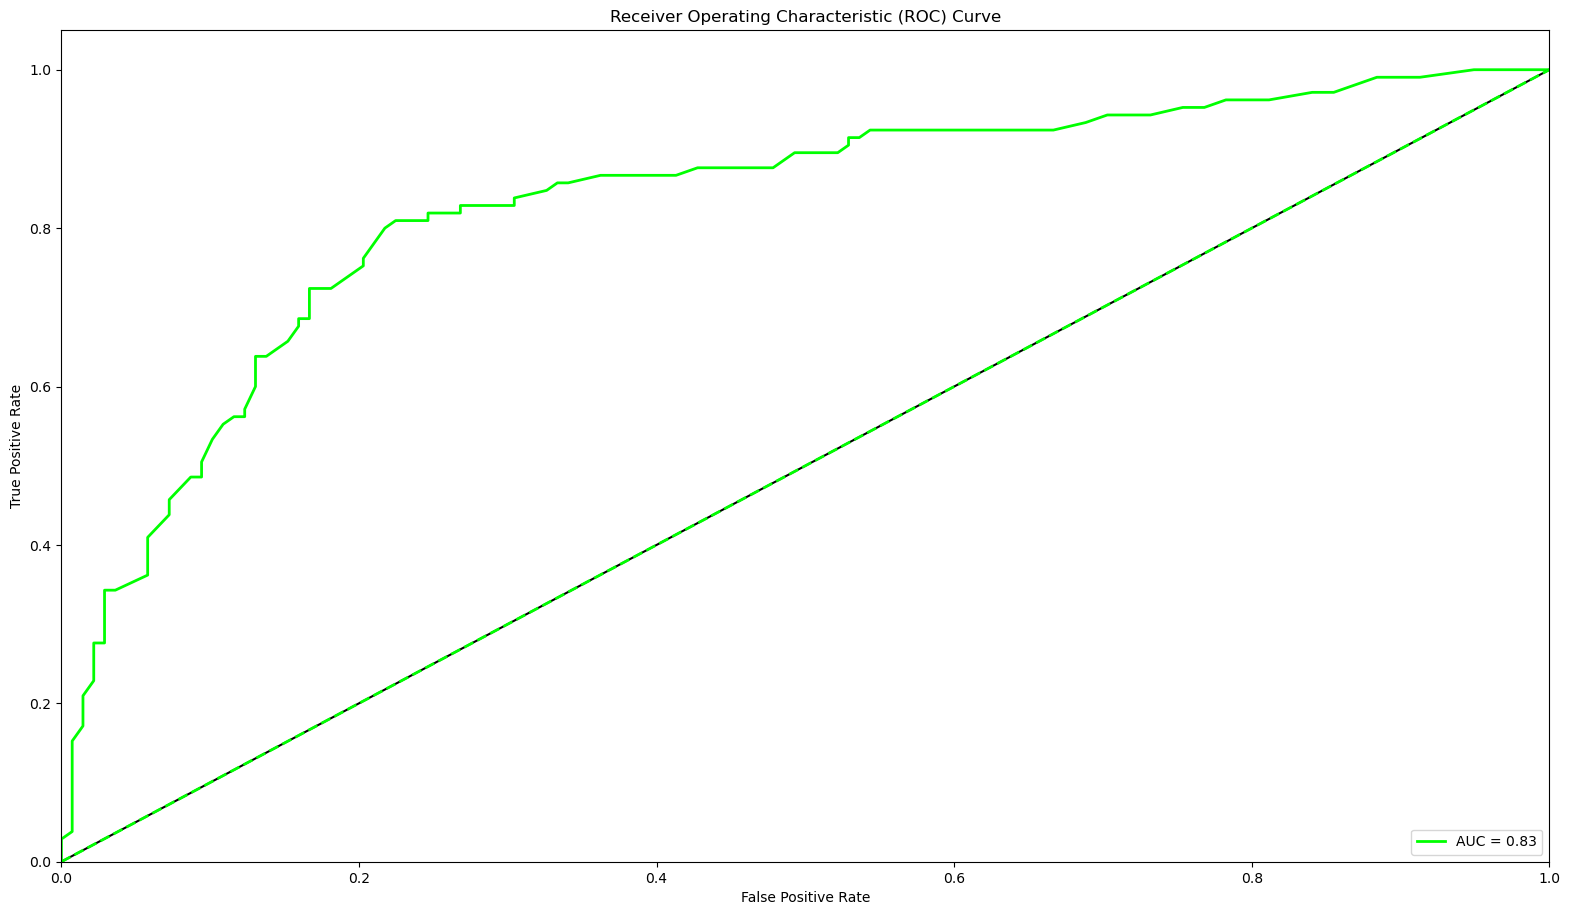

Model saved at ML_MODEL/logistic_regression_model.pkl


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib  # For saving the model

# Initialize Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix 
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False, xticklabels=['No-Landslide', 'Landslide'], yticklabels=['No-Landslide', 'Landslide'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(19.2, 10.8))
plt.plot(fpr, tpr, color='lime', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='black')
plt.plot([0, 1], [0, 1], color='lime', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/logistic_regression_model.pkl'
joblib.dump(pipeline, model_path)
print(f'Model saved at {model_path}')